In [1]:
import collaborative_filtering_tools as cf
import numpy as np

## Utility matrix creation

In [2]:
cf.get_client_indices('train_ver2_month1-16')

creating ../train_ver2_month1-16_client_indices.npy
chunk 0 from 1271.5856. (0.067291 secs)
chunk 127 from 1271.5856. (849.389498 secs)
chunk 254 from 1271.5856. (1639.744911 secs)
chunk 381 from 1271.5856. (2348.644979 secs)
chunk 508 from 1271.5856. (3073.238852 secs)
chunk 635 from 1271.5856. (3762.042826 secs)
chunk 762 from 1271.5856. (4456.501061 secs)
chunk 889 from 1271.5856. (5145.896393 secs)
chunk 1016 from 1271.5856. (5913.382765 secs)
chunk 1143 from 1271.5856. (6668.925796 secs)
chunk 1270 from 1271.5856. (7432.371488 secs)


array([ 805101.,  539860.,  539861., ...,  737066.,  737048.,  737051.])

In [2]:
train_utility_matrix,client_n_months = cf.get_utility_matrix('train_ver2_month1-16')

creating ../train_ver2_month1-16_utility_matrix.npy
chunk 0 from 1271.5856. (0.0010167 minutes)


collaborative_filtering_tools.py:186: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  client_n_months[chunk_client_indices[il]] += 1
collaborative_filtering_tools.py:187: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  utility_matrix[chunk_client_indices[il],ip] \
collaborative_filtering_tools.py:188: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  += getattr(chunk,product_id)[il]


chunk 127 from 1271.5856. (12.0902705 minutes)
chunk 254 from 1271.5856. (24.30438965 minutes)
chunk 381 from 1271.5856. (36.6481646833 minutes)
chunk 508 from 1271.5856. (48.0570303833 minutes)
chunk 635 from 1271.5856. (59.6738215167 minutes)
chunk 762 from 1271.5856. (71.0254116167 minutes)
chunk 889 from 1271.5856. (82.9720804333 minutes)
chunk 1016 from 1271.5856. (95.3965232333 minutes)
chunk 1143 from 1271.5856. (107.909131833 minutes)
chunk 1270 from 1271.5856. (120.28502055 minutes)


In [ ]:
train_utility_matrix,client_n_months = cf.get_utility_matrix('train_ver2')
print train_utility_matrix.shape

creating ../train_ver2_utility_matrix.npy
chunk 0 from 1364.731. (0.00121358333333 minutes)


collaborative_filtering_tools.py:187: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  client_n_months[chunk_client_indices[il]] += 1
collaborative_filtering_tools.py:188: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  utility_matrix[chunk_client_indices[il],ip] \
collaborative_filtering_tools.py:189: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  += getattr(chunk,product_id)[il]


## plot mean_user_rating

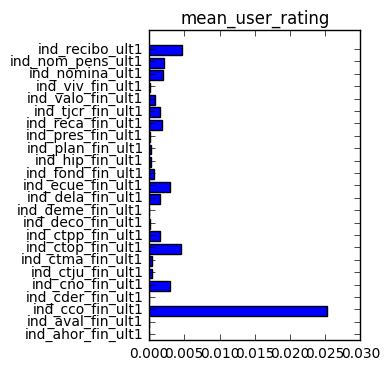

In [8]:
train_utility_matrix,client_n_months = cf.get_utility_matrix('train_ver2_month1-16')
product_ids = cf.get_product_ids('train_ver2_month1-16')

mean_user_rating = np.nanmean(train_utility_matrix,axis=0)
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(122)
ax1.barh(range(mean_user_rating.shape[0]),mean_user_rating)
plt.yticks(np.array(range(mean_user_rating.shape[0]))+0.5, product_ids)
plt.title('mean_user_rating')
plt.show()

In [ ]:
## Prediction

In [4]:
item_prediction = cf.predict_memory_based(train_utility_matrix, type='item')
print item_prediction.shape

(951952, 24)


In [7]:
print train_utility_matrix.shape
print item_prediction.shape

(951952, 24)
(951952, 24)
